## Nguyễn Thành Thuận
## Mssv: 20127639
## Lớp 21CLC07

## Báo Cáo Đồ án 1 - Color Compression <a class="anchor" id="c2"></a>

### 1. Nội dung đồ án <a class="anchor" id="c21"></a>

#### Giới thiệu

Một bức ảnh có thể lưu trữ dưới ma trận của các điểm ảnh. Có nhiều loại ảnh được sử dụng trong thực tế, ví dụ: ảnh xám, ảnh màu,...

Đối với ảnh xám, một điểm ảnh sẽ là được biểu diễn bằng giá trị không âm.

Ví dụ ta có thể dùng ma trận này:
$$\begin{bmatrix}
255 & 0 & 0  & 0  & 255 \\
255 & 0 & 255 & 0 & 255\\
255 & 0 & 255 & 0 & 255\\
255 & 0 & 255 & 0 & 255\\
255 & 0 & 0  & 0  & 255
\end{bmatrix}$$

có thể biểu diễn cho ảnh xám có nội dung như sau:

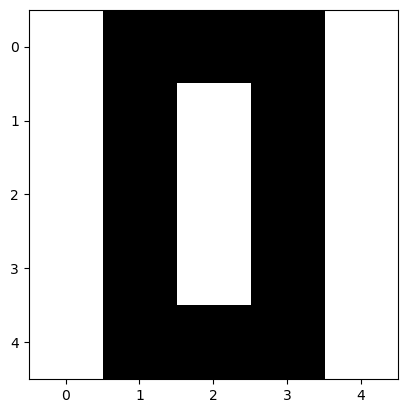

In [4]:
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(np.array([[255, 0, 0, 0, 255],
                     [255, 0, 255, 0, 255],
                     [255, 0, 255, 0, 255],
                     [255, 0, 255, 0, 255],
                     [255, 0, 0, 0, 255]]), cmap='gray', vmin=0, vmax=255);

Ảnh màu được sử dụng phổ biến là ảnh RGB, trong đó, mỗi điểm ảnh sẽ lưu trữ 3 thông tin kênh màu (mỗi kênh màu 1 byte) là: R (red - đỏ), G (green - xanh lá), B (blue - xanh dương). Ta có thể sử dụng ma trận:
```
                    [[[255, 255, 255], [255, 0, 0], [255, 0, 0], [255, 0, 0], [255, 255, 255]],
                     [[255, 255, 255], [255, 0, 0], [255, 255, 255], [255, 0, 0], [255, 255, 255]],
                     [[255, 255, 255], [255, 0, 0], [255, 255, 255], [255, 0, 0], [255, 255, 255]],
                     [[255, 255, 255], [255, 0, 0], [255, 255, 255], [255, 0, 0], [255, 255, 255]],
                     [[255, 255, 255], [255, 0, 0], [255, 0, 0], [255, 0, 0], [255, 255, 255]]]
```
để biểu diễn cho ảnh màu có nội dung sau:

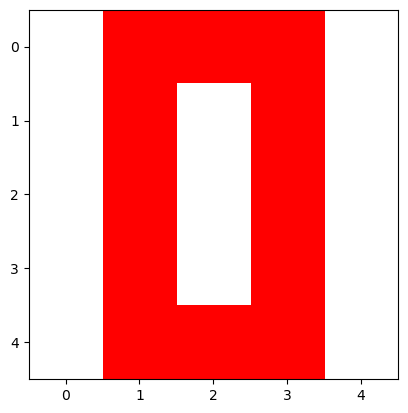

In [5]:
import matplotlib.pyplot as plt
plt.imshow(np.array([[[255, 255, 255], [255, 0, 0], [255, 0, 0], [255, 0, 0], [255, 255, 255]],
                     [[255, 255, 255], [255, 0, 0], [255, 255, 255], [255, 0, 0], [255, 255, 255]],
                     [[255, 255, 255], [255, 0, 0], [255, 255, 255], [255, 0, 0], [255, 255, 255]],
                     [[255, 255, 255], [255, 0, 0], [255, 255, 255], [255, 0, 0], [255, 255, 255]],
                     [[255, 255, 255], [255, 0, 0], [255, 0, 0], [255, 0, 0], [255, 255, 255]]]));

Như vậy, số màu trong ảnh RGB có thể là $256^3 \approx 1.7 \times 10^7$. Với số lượng màu khá lớn, khi lưu trữ ảnh có thể sẽ tốn chi phí lưu trữ. Do đó bài toán đặt ra là giảm số lượng màu để biểu diễn ảnh sao cho nội dung ảnh được bảo toàn nhất có thể.

### 2. Yêu cầu đồ án <a class="anchor" id="c21"></a>

####  a. Yêu cầu


Trong đồ án này, bạn được yêu cầu cài đặt chương trình giảm số lượng màu cho ảnh sử dụng thuật toán [K-Means].

Các thư viện được phép sử dụng là: `NumPy` (tính toán ma trận), `PIL` (đọc, ghi ảnh), `matplotlib` (hiển thị ảnh).

#### b. Giới thiệu thuật toán K_Means

K-means là một thuật toán phân cụm đơn giản thuộc loại dữ liệu không có nhãn. Ý tưởng của thuật toán này là phân chia 1 bộ dữ liệu thành nhiều cụm khác nhau. Trong đó số lượng cụm sẽ được cho trước là 1 số k bất kì, công việc phân cụm được dựa trên nguyên lí là: `Các điểm dữ liệu trong cùng 1 cụm thì bắt buộc phải có 1 số tính chất nhất định`. Nghĩa là giữa các điểm trong cùm 1 cụm thì phải có sự liên quan với nhau. 

`Đối với máy tính thì các điểm trong cùng 1 cụm sẽ là các điểm dữ liệu gần nhau.`

Thuật toán K-means thường được sử dụng trong các ứng dụng cỗ máy tìm kiếm, phân đoạn khách hàng hoặc thóng kê dữ liệu, ...

#### c. Mô tả các bước trong thuật toán K_Means

`Bước 1:` Khởi tạo ngẫu nhiên k điểm trong tập dữ liệu để làm centroid(điểm trung tâm của cụm) ban đầu.

`Bước 2:` Tính khoảng cách từ từng điểm dữ liệu đến tất cả các centroid được khởi tạo.

`Bước 3:` Tiến hành gán mỗi điểm dữ liệu vào cụm có trung tâm gần điểm đó nhất(nghĩa là cụm mà khoảng cách từ điểm dữ liệu tới centroid của cụm đó là nhỏ nhất).

`Bước 4:` Bước 2 và bước 3 sẽ được lặp đi lặp lại cho tới khi vị trí của tâm cụm không thay đổi hoặc tâm của tất cả các điểm dữ liệu không thay đổi.

`Bước 5:` Nếu việc cập nhật lại vị trí của các tâm cụm không có thay đổi gì thì có nghĩa là chúng ta đã có thể dừng và đưa ra kết quả.

### 3. Phân tích các hàm sử dụng trong thuật toán K_Means <a class="anchor" id="c21"></a>

#### a. Trình bày thuật toán

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from time import perf_counter_ns


class ImageProcessor:
    def __init__(self, image_path, n_colors, max_iters):    
        self.image = Image.open(image_path)
        self.n_colors = n_colors
        self.max_iters = max_iters
        self.reduced_image = None

    def k_means(self):
        image_array = np.array(self.image)
        image_2d = image_array.reshape(-1, 3).astype(float)
        centers = image_2d[np.random.choice(range(len(image_2d)), 
                        self.n_colors, replace=False)]

        for _ in range(self.max_iters):
            distances = np.linalg.norm(image_2d[:, np.newaxis] - centers, axis=-1)
            labels = np.argmin(distances, axis=-1)
            new_centers = np.array([image_2d[labels == k].mean(axis=0) for k in range(self.n_colors)])
            if np.all(centers == new_centers):
                break
            centers = new_centers

        labels = np.argmin(np.linalg.norm(image_2d[:, np.newaxis] - centers, axis=-1), axis=-1)
        colors = centers
        self.reduced_image = colors[labels].reshape(image_array.shape)
        return self.reduced_image

    def visualize(self):
        if self.reduced_image is None:
            print("No reduced image found. Perform k-means first.")
            return
        plt.imshow(self.reduced_image.astype(np.uint8))
        plt.title('Reduced Color Image')
        plt.show()

#### b. Phân tích các hàm

Hàm `__init__(self, image_path, n_colors, max_iters):` 

Hàm khởi tạo của lớp. Nó nhận vào đường dẫn của hình ảnh (image_path), số lượng màu được giảm (n_colors), và số lần lặp tối đa (max_iters). 

Hàm này khởi tạo các thuộc tính self.image (được mở bằng Image.open(image_path)), self.n_colors, self.max_iters, và self.reduced_image (khởi tạo ban đầu là None).

Tiếp theo là hàm `k_means(self):` 

Hàm này thực hiện thuật toán K-means trên hình ảnh. Đầu tiên, nó chuyển đổi hình ảnh thành một mảng numpy `image_array`. Sau đó, mảng `image_array` được chuyển thành một ma trận 2D (`image_2d`) bằng cách reshape và chuyển đổi các giá trị thành kiểu float.

Tiếp theo, các trung tâm ban đầu được chọn ngẫu nhiên từ `image_2d` bằng cách chọn một số chỉ mục ngẫu nhiên không lặp lại từ 0 đến độ dài của `image_2d`.

Trong vòng lặp, thuật toán `K-means` được áp dụng. Đầu tiên, khoảng cách giữa mỗi điểm dữ liệu trong `image_2d` và trung tâm gần nhất được tính bằng np.linalg.norm. Sau đó, nhãn của mỗi điểm dữ liệu được xác định bằng `np.argmin` của khoảng cách. Trung tâm mới được tính bằng cách lấy trung bình các điểm dữ liệu có cùng nhãn. Nếu trung tâm mới không khác biệt so với trung tâm trước đó, vòng lặp dừng lại.

Cuối cùng, nhãn của mỗi điểm dữ liệu được xác định lại bằng cách tính khoảng cách đến các trung tâm và chọn nhãn có khoảng cách nhỏ nhất. Mảng centers chứa các giá trị màu của các trung tâm, và `self.reduced_image` chứa hình ảnh đã được giảm màu. Hàm trả về `self.reduced_image`.

Cuối cùng là hàm `visualize(self):`

Hàm này hiển thị hình ảnh đã được giảm màu bằng cách sử dụng thư viện `Matplotlib`. 

Nếu `self.reduced_image` là __None__, nghĩa là chưa có hình ảnh đã giảm màu, hàm sẽ in ra thông báo "**No reduced image found. Perform k-means first.**". Nếu có `self.reduced_image`, hình ảnh được hiển thị bằng `plt.imshow` và tiêu đề là '**Reduced Color Image**'.

#### c. So sánh ảnh trước và sau khi được giảm màu

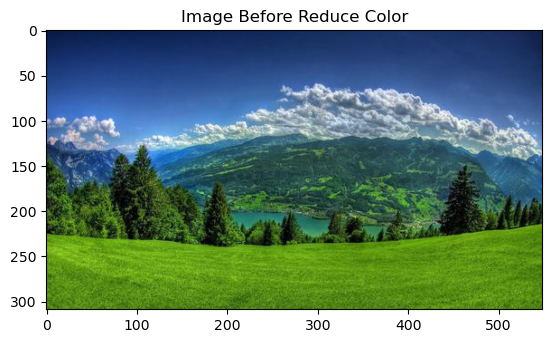

In [32]:
# Ảnh trước khi được giảm màu
test = Image.open('img.jpg')
plt.imshow(test)
plt.title('Image Before Reduce Color')
plt.show()

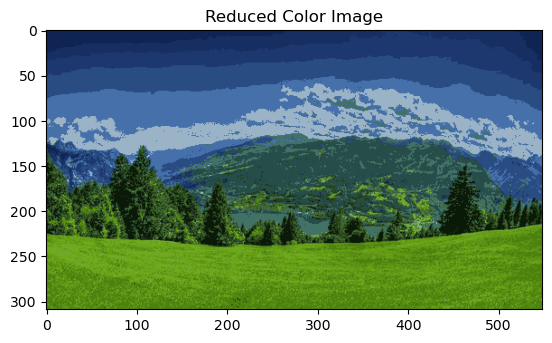

In [28]:
# Ảnh sau khi được giảm màu với max_iters = 3
# usage
processor = ImageProcessor('img.jpg', n_colors=16, max_iters=3)
processor.k_means()
processor.visualize() 

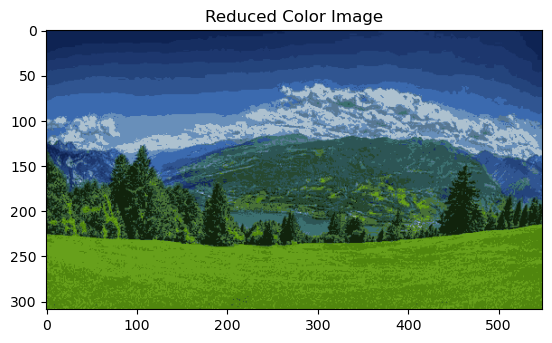

In [29]:
# Ảnh sau khi được giảm màu với max_iters = 5
# usage
processor = ImageProcessor('img.jpg', n_colors=16, max_iters=5)
processor.k_means()
processor.visualize() 

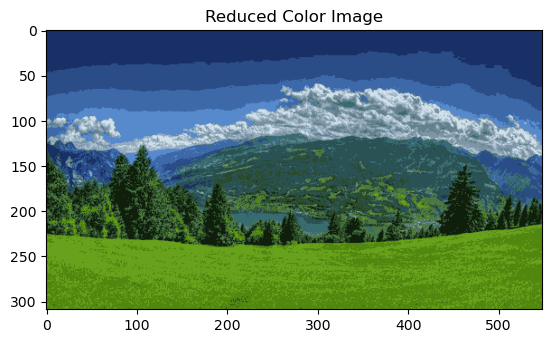

In [30]:
# Ảnh sau khi được giảm màu với max_iters = 7
# usage
processor = ImageProcessor('img.jpg', n_colors=16, max_iters=7)
processor.k_means()
processor.visualize() 

**Nhận xét:**
Sau khi áp dụng thuật toán k_means vào để làm giảm màu của ảnh ban đầu thì bức ảnh mới cho ra cũng khá giống với bức ảnh ban đầu khi chưa áp dụng thuật toán k_means.

Tuy nhiên do đã giảm màu xuống chỉ còn lại 16 màu nên độ chi tiết của bức ảnh cũng không còn rõ nét như ban đầu và bức ảnh sẽ có thiên hướng nhạt hơn.

Với `max_iters = 3`: thì ta nhận thấy màu của bầu trời xanh đã bị phân tầng ra khá nhiều, đồng thời thì màu của mây cũng bị giảm độ chi tiết khá là nhiều cũng như màu xanh của núi đồi bị nhoè đi nhiều hơn do số lần chạy quá ít.

Với `max_iters = 5`: thì ta nhận thấy màu của bầu trời xanh cũng bị phân tầng ra nhiều dãy và nhiều hơn của `max_iters = 3`, tuy nhiên thì màu của mây cũng như của núi đồi không thay đổi nhiều so với hình ảnh gốc ban đầu.

Với `max_iters = 7`: thì ta nhận thấy màu xanh của bầu trời cũng bị phân tầng nhưng ít hơn 2 trường hợp trên, bên cạnh đó thì độ nét của các chi tiết còn lại cũng nét hơn và hầu như giống gần 90% so với hình ảnh gốc.